In [163]:
%env SPS_HOME=/Users/dab5467/myPython/fsps          
import fsps
import matplotlib.pyplot as plt

import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.layouts import row
from bokeh.palettes import Viridis8, Plasma7, Viridis7

fontsize = 16

plt.rc('text',  usetex=True)
plt.rc('xtick', labelsize=fontsize, direction='in')
plt.rc('ytick', labelsize=fontsize, direction='in')
gray    = '#9E9E9E'
%matplotlib inline

env: SPS_HOME=/Users/dab5467/myPython/fsps


In [25]:
help(fsps.StellarPopulation)

Help on class StellarPopulation in module fsps.fsps:

class StellarPopulation(builtins.object)
 |  StellarPopulation(compute_vega_mags=False, vactoair_flag=False, zcontinuous=0, **kwargs)
 |
 |  This is the main interface to use when interacting with FSPS from Python.
 |  Most of the Fortran API is exposed through Python hooks with various
 |  features added for user friendliness. It is recommended to only
 |  instantiate one StellarPopulation object in a given program. When
 |  initializing, you can set any of the parameters of the system using keyword
 |  arguments. Below, you'll find a list of the options that you can include
 |  (with the comments taken directly from the `FSPS docs
 |  <https://github.com/cconroy20/fsps/blob/master/doc/MANUAL.pdf>`_). Unless
 |  otherwise noted, you can change these values later using the ``params``
 |  property—which is ``dict``-like.  For example:
 |
 |  ::
 |
 |      sp = StellarPopulation(imf_type=2, zcontinuous=1)
 |      sp.params["imf_type"]

# Age variations:

In [106]:
# set up StellarPopulation objects
sp = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=False, add_neb_emission=False)
esp = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
# set stellar metallicity
sp.params['logzsol'] = -1.0 # stellar population metallicity
esp.params['logzsol'] = -1.0
# set parameters for nebular model
esp.params['gas_logz'] = -1.0 # gas metallicity
esp.params['gas_logu'] = -2.0 # ionization parameter

In [107]:
lam1,  spec1 =  sp.get_spectrum(peraa=True, tage=1.e6/1.e9)  # 1 Myr (in units of Gyr)
lam1, espec1 = esp.get_spectrum(peraa=True, tage=1.e6/1.e9)  
lam2,  spec2 =  sp.get_spectrum(peraa=True, tage=2.e6/1.e9)  # 2 Myr (in units of Gyr)
lam2, espec2 = esp.get_spectrum(peraa=True, tage=2.e6/1.e9) 
lam4,  spec4 =  sp.get_spectrum(peraa=True, tage=4.e6/1.e9)  # 4 Myr (in units of Gyr)
lam4, espec4 = esp.get_spectrum(peraa=True, tage=4.e6/1.e9) 
lam6,  spec6 =  sp.get_spectrum(peraa=True, tage=6.e6/1.e9)  # 6 Myr (in units of Gyr)
lam6, espec6 = esp.get_spectrum(peraa=True, tage=6.e6/1.e9) 
lam8,  spec8 =  sp.get_spectrum(peraa=True, tage=8.e6/1.e9)  # 8 Myr (in units of Gyr)
lam8, espec8 = esp.get_spectrum(peraa=True, tage=8.e6/1.e9) 
lam10, spec10=  sp.get_spectrum(peraa=True, tage=10.e6/1.e9)  # 10 Myr (in units of Gyr)
lam10,espec10= esp.get_spectrum(peraa=True, tage=10.e6/1.e9) 
lam20, spec20=  sp.get_spectrum(peraa=True, tage=20.e6/1.e9)  # 10 Myr (in units of Gyr)
lam20,espec20= esp.get_spectrum(peraa=True, tage=20.e6/1.e9) 
lam40, spec40=  sp.get_spectrum(peraa=True, tage=40.e6/1.e9)  # 10 Myr (in units of Gyr)
lam40,espec40= esp.get_spectrum(peraa=True, tage=40.e6/1.e9) 

Text(0, 0.5, 'Norm. $F_\\lambda$')

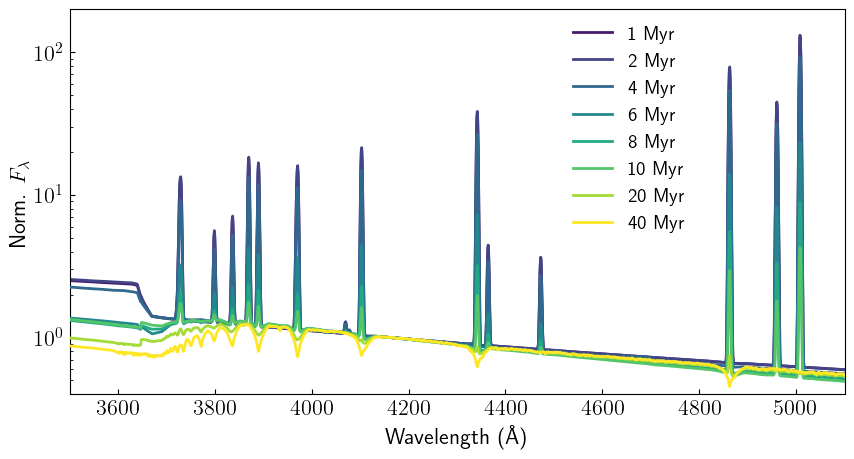

In [108]:
import matplotlib as mpl
vmap = mpl.colormaps['viridis']
# Take colors at regular intervals spanning the colormap.
cmap = vmap(np.linspace(0, 1, 16))


fig, ax = plt.subplots(1, figsize=(10,5))
# ax.loglog(lam1,  spec1, label='No Nebular Model', lw=2)
ax.plot(lam1, espec1/ np.mean( espec1[(lam1 >4150)&(lam1 <4175)]),lw=2, color=cmap[1], zorder=1, label='1 Myr')
ax.plot(lam2, espec2/ np.mean( espec2[(lam2 >4150)&(lam2 <4175)]),lw=2, color=cmap[3], zorder=2, label='2 Myr')
ax.plot(lam4, espec4/ np.mean( espec4[(lam4 >4150)&(lam4 <4175)]),lw=2, color=cmap[5], zorder=3, label='4 Myr')
ax.plot(lam6, espec6/ np.mean( espec6[(lam6 >4150)&(lam6 <4175)]),lw=2, color=cmap[7], zorder=4, label='6 Myr')
ax.plot(lam8, espec8/ np.mean( espec8[(lam8 >4150)&(lam8 <4175)]),lw=2, color=cmap[9], zorder=5, label='8 Myr')
ax.plot(lam10,espec10/np.mean(espec10[(lam10>4150)&(lam10<4175)]),lw=2, color=cmap[11],zorder=6, label='10 Myr')
ax.plot(lam20,espec20/np.mean(espec20[(lam20>4150)&(lam20<4175)]),lw=2, color=cmap[13],zorder=7, label='20 Myr')
ax.plot(lam40,espec40/np.mean(espec40[(lam40>4150)&(lam40<4175)]),lw=2, color=cmap[15],zorder=8, label='40 Myr')
ax.set_xlim(3500., 5100.)
ax.set_ylim(0.4e0, 2e2)
ax.set_yscale('log')
ax.legend(loc=(0.64,0.40), fontsize=14, frameon=False)
ax.set_xlabel(r'Wavelength (\AA) ', fontsize=16)
ax.set_ylabel(r'Norm. $F_\lambda$', fontsize=16)

In [205]:
# output_notebook()  # show Bokeh inline in Jupyter

# # ----------------------------------------------------
# # 1. Normalize your existing spectra (no new FSPS calls)
# # ----------------------------------------------------
# def normalize_spec(lam, spec):
#     norm = np.mean(spec[(lam > 4150) & (lam < 4175)])
#     return spec / norm

# spec1n  = normalize_spec(lam1,  espec1)
# spec2n  = normalize_spec(lam2,  espec2)
# spec4n  = normalize_spec(lam4,  espec4)
# spec6n  = normalize_spec(lam6,  espec6)
# spec8n  = normalize_spec(lam8,  espec8)
# spec10n = normalize_spec(lam10, espec10)
# spec20n = normalize_spec(lam20, espec20)
# spec40n = normalize_spec(lam40, espec40)

# # Assume all wavelengths are identical (FSPS standard)
# lam = lam1

# # ----------------------------------------------------
# # 2. Bundle everything in an ordered list for safety
# # ----------------------------------------------------
# age_specs = [("1 Myr",  spec1n), 
#              ("2 Myr",  spec2n),
#              ("4 Myr",  spec4n),
#              ("6 Myr",  spec6n),
#              ("8 Myr",  spec8n),
#              ("10 Myr", spec10n),
#              ("20 Myr", spec20n),
#              ("40 Myr", spec40n),]

# # Build the ColumnDataSource dict
# data_dict = {"lam": lam}
# col_names = []    # keys we'll use for plotting
# labels    = []    # nice labels for legend & checkboxes

# for i, (label, spec) in enumerate(age_specs):
#     col_name = f"age_{i}"   # e.g., age_0, age_1, ...
#     data_dict[col_name] = spec
#     col_names.append(col_name)
#     labels.append(label)

# source = ColumnDataSource(data=data_dict)

# # ----------------------------------------------------
# # 3. Figure + lines (colors mapped 1:1 to age order)
# # ----------------------------------------------------
# colors = Viridis8  # 8 distinct colors

# p = figure(width=800, height=450, x_range=(3500, 5100), y_range=(0.4, 2e2),
#            x_axis_type="linear", y_axis_type="log", title="FSPS nebular SEDs at different ages",)

# renderers = []
# for col_name, color, label in zip(col_names, colors, labels):
#     r = p.line('lam', col_name, source=source, line_width=2, color=color, legend_label=label,)
#     renderers.append(r)
    
# p.xaxis.axis_label = r"Wavelength (Å)"   # Å
# p.yaxis.axis_label = "Norm. Flux"         # Fλ
# p.legend.location = (550,150)
# p.legend.click_policy = "hide"  # click legend entries to hide/show

# p.title.text_font_size = "16pt"
# p.xaxis.axis_label_text_font_size = "14pt"
# p.yaxis.axis_label_text_font_size = "14pt"

# # ----------------------------------------------------
# # 4. Emission-line markers + hover labels
# # ----------------------------------------------------
# # Emission-line dictionary: label → wavelength (Å)
# emission_lines = {
#     "[O II] 3727": 3727.0,
#     "Hδ 4102":     4102.0,
#     "Hγ 4340":     4340.0,
#     "Hβ 4861":     4861.0,
#     "[O III] 4959": 4959.0,
#     "[O III] 5007": 5007.0,
#     # Add more if you expand x_range later (e.g., Hα 6563)
#     # "Hα 6563":     6563.0,
# }

# # Use the 1 Myr spectrum to position labels vertically
# line_lam   = []
# line_flux  = []
# line_label = []

# for name, lam0 in emission_lines.items():
#     # Only add lines that fall within the plotted x-range
#     if (lam.min() <= lam0 <= lam.max()):
#         line_lam.append(lam0)
#         line_flux.append(np.interp(lam0, lam, spec1n))
#         line_label.append(name)

# line_source = ColumnDataSource(data=dict(
#     lam=line_lam,
#     flux=line_flux,
#     label=line_label,
# ))

# # Invisible markers that appear on hover
# line_renderer = p.circle(
#     'lam',
#     'flux',
#     source=line_source,
#     size=10,
#     alpha=0.0,           # invisible by default
#     hover_alpha=0.9,     # visible when hovered
#     color="black",
#     hover_color="black",
#     legend_label=None,
# )

# # Hover tool that targets ONLY these emission-line markers
# hover_lines = HoverTool(
#     renderers=[line_renderer],
#     tooltips=[
#         ("Line", "@label"),
#         ("λ", "@lam{0} Å"),
#         ("Flux (1 Myr norm.)", "@flux{0.000}"),
#     ],
# )

# p.add_tools(hover_lines)

# # ----------------------------------------------------
# # 5. Checkbox group to toggle visibility
# # ----------------------------------------------------
# checkboxes = []
# for label in labels:
#     cb = CheckboxGroup(labels=[label], active=[0])   # checked by default
#     checkboxes.append(cb)

# checkbox_row = row(*checkboxes)

# # Callback to toggle line visibility
# callback = CustomJS(
#     args=dict(renderers=renderers, checkbox_list=checkboxes),
#     code="""
#         for (let i = 0; i < renderers.length; i++) {
#             let cb = checkbox_list[i];
#             renderers[i].visible = (cb.active.length > 0);
#         }
#     """
# )

# # Connect each checkbox to the callback
# for cb in checkboxes:
#     cb.js_on_change("active", callback)

# # ----------------------------------------------------
# # 6. Layout + show + save
# # ----------------------------------------------------
# layout = column(p, checkbox_row)
# show(layout)

# output_file("fsps_ages_interactive.html", title="FSPS Age Series")
# save(layout)

In [206]:
emission_lines = {
    "[O II] 3727":  3727.0,
    "H10 3798":     3797.91,
    "He I 3820":    3819.61,
    "H9 3835":      3835.39,
    "[Ne III] 3869":3868.76,
    "He I 3889":    3888.65,
    "H8 3889":      3889.06,
    "He I 3965":    3964.729,
    "[Ne III] 3967":3967.470,
    "H7 3970":      3970.075,
#     "Ne III 4012":  4011.600,
    "He I 4026":    4026.191,
    "[S II] 4069":  4068.600,
    "[S II] 4076":  4076.350,
    "Hδ 4102":      4101.709,
    "He I 4121":    4120.815,
    "He I 4144":    4143.761,
#     "[Fe v]  4227": 4227.19,
#     "C II 4267":    4267.260,
    "[Fe II] 4287": 4287.393,
    "Hγ 4340":      4340.437,
#     "[Fe II] 4359": 4359.332,
    "[O III] 4363": 4363.209,
    "He I 4388":    4387.930,
    "He I 4471":    4471.480,
    "He II 	4542":  4541.600,
    "[Fe III] 4658":4658.050,
    "He II 4686":   4685.703,
#     "[ArIV] 4711":  4711.350,
    "He I 4713":    4713.146,
#     "[Ar IV] 4740": 4740.200,
#     "Fe II 4827":   4826.683,
    "Hβ 4861":      4861.350,
#     "Fe II 4883":   4883.293,
#     "[Fe IV]4907":  4906.560,
    "He I 4922":    4921.931,
    "[O III] 4959": 4958.911,
#     "Fe II 4977":   4977.033,
#     "Fe II 4984":   4984.485,
#     "Fe II 4991":   4990.506,
    "[O III] 5007": 5006.843,
    "He I 5016":    5015.678,
#     "[N I]  5198":  5197.902,
#     "[N I]  5200":  5200.257,
#     "[Fe IV] 5234": 5233.760,
#     "[Fe III] 5270":5270.400,
    "[Cl III] 5518":5517.709,
    "[Cl III] 5538":5537.873,
#     "O I 5577":     5577.340,
    "[N II] 5755":  5754.590,
    "He I  5876":   5875.621,
    "[O I]  6300":  6300.304,
    "[S III] 6312": 6312.060,
    "[O I] 6363":   6363.776,
    "[N II] 6548":  6548.050,
    "Halpha 6562":  6562.790,
    "[N II] 6583":  6583.450,
    "He I 6678":    6678.151,
    "[S II] 6716":  6716.440,
    "[S II] 6731":  6730.815,
    "He I 7065":    7065.190,
    "[Ar III] 7136":7135.800,
#     "[Fe III] 7155":7155.174,
    "He I 7281":    7281.349,
    "[O II] 7320":  7319.920,
    "[O II] 7330":  7330.190,
    "[Ar III] 7751":7751.060,
    "[Ar III] 8037":8036.520,
    "P18 8438":    8437.950,
    "OI  8446":    8446.360,
    "P17 8467":    8467.260,
    "P16 8502":    8502.490,
    "P15 8545":    8545.380,
    "P14 8598":    8598.390,
    "He I 8617":   8617.400,
    "He I 8635":   8635.100,
    "P13 8665":    8665.020,
    "P12 8750":    8750.460,
    "[S III] 8829":8829.400,
    "P11 8863":    8862.890,
    "P10 9015":    9015.300,
    "[S III] 9069":9068.600,
    "P9 9230":     9229.700,
    "[S III] 9531":9530.600,
    "P8 9546":     9546.200
    # If you later extend x_range to redder λ, you can add:
    # "Hα 6563":     6563.0,
}

In [216]:
import numpy as np

from bokeh.io import output_notebook, show, output_file, save
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CheckboxGroup
from bokeh.models import Span, CustomJS, HoverTool
from bokeh.layouts import row, column
from bokeh.palettes import Viridis8

output_notebook()  # show Bokeh inline in Jupyter

# ----------------------------------------------------
# 1. Normalize your existing spectra (no new FSPS calls)
# ----------------------------------------------------
def normalize_spec(lam, spec):
    norm = np.mean(spec[(lam > 4150) & (lam < 4175)])
    return spec / norm

spec1n  = normalize_spec(lam1,  espec1)
spec2n  = normalize_spec(lam2,  espec2)
spec4n  = normalize_spec(lam4,  espec4)
spec6n  = normalize_spec(lam6,  espec6)
spec8n  = normalize_spec(lam8,  espec8)
spec10n = normalize_spec(lam10, espec10)
spec20n = normalize_spec(lam20, espec20)
spec40n = normalize_spec(lam40, espec40)

# Assume all wavelengths are identical (FSPS standard)
lam = lam1

# ----------------------------------------------------
# 2. Bundle everything in an ordered list for safety
# ----------------------------------------------------
age_specs = [
    ("1 Myr",  spec1n),
    ("2 Myr",  spec2n),
    ("4 Myr",  spec4n),
    ("6 Myr",  spec6n),
    ("8 Myr",  spec8n),
    ("10 Myr", spec10n),
    ("20 Myr", spec20n),
    ("40 Myr", spec40n),
]

# Build the ColumnDataSource dict
data_dict = {"lam": lam}
col_names = []    # keys we'll use for plotting
labels    = []    # nice labels for legend & checkboxes

for i, (label, spec) in enumerate(age_specs):
    col_name = f"age_{i}"   # e.g., age_0, age_1, ...
    data_dict[col_name] = spec
    col_names.append(col_name)
    labels.append(label)

source = ColumnDataSource(data=data_dict)

# ----------------------------------------------------
# 3. Figure + lines (colors mapped 1:1 to age order)
# ----------------------------------------------------
colors = Viridis8  # 8 distinct colors

p = figure(
    width=800,
    height=450,
    x_range=(3500, 5100),
    y_range=(0.4, 2e2),
    x_axis_type="linear",
    y_axis_type="log",
    title="FSPS nebular SEDs at different ages",
)

renderers = []
for col_name, color, label in zip(col_names, colors, labels):
    r = p.line(
        'lam',
        col_name,
        source=source,
        line_width=2,
        color=color,
        legend_label=label,
    )
    renderers.append(r)

p.xaxis.axis_label = r"Wavelength (Å)"   # Å
p.yaxis.axis_label = "Norm. Flux"       # Fλ
p.legend.location = (550, 150)
p.legend.click_policy = "hide"          # click legend entries to hide/show

p.title.text_font_size = "16pt"
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_size = "14pt"

# ----------------------------------------------------
# 4. Emission-line markers + hover labels
# ----------------------------------------------------
from bokeh.models import ColumnDataSource

# Emission-line dictionary: label → wavelength (Å)
hover_left   = []
hover_right  = []
hover_label  = []
hover_center = []

for name, lam0 in emission_lines.items():
    if lam.min() <= lam0 <= lam.max():
        hover_left.append(lam0 - 2.0)
        hover_right.append(lam0 + 2.0)
        hover_label.append(name)
        hover_center.append(lam0)

hover_source = ColumnDataSource(dict(
    left=hover_left, right=hover_right, label=hover_label, lam0=hover_center,))

quad_renderer = p.quad(
    left="left",right="right",
    bottom=0.4,top=2e2,   # your y_range[0], # your y_range[1]
    source=hover_source,
    fill_alpha=0.0, line_alpha=0.0,
    hover_fill_alpha=0.0, hover_line_alpha=0.0,)

hover_lines = HoverTool(
    renderers=[quad_renderer],
    tooltips=[("Line", "@label"),("λ", "@lam0{0} Å"),],
    callback=hover_callback,)

p.add_tools(hover_lines)

from bokeh.models import Span, CustomJS
from bokeh.events import MouseMove

# Vertical line we’ll move around
vline = Span(location=0, dimension="height", line_color="black",
             line_width=1.5, line_alpha=0.0,  ) # start invisible
p.add_layout(vline)

# JS callback on mouse move to control the vertical line
mouse_move_callback = CustomJS(
    args=dict(source=hover_source, vline=vline),
    code="""
        const lam0s = source.data['lam0'];
        const x = cb_obj.x;  // mouse x in data coordinates

        if (x == null) {
            vline.line_alpha = 0.0;
            return;       }

        let minDiff = Infinity;
        let closest = null;

        for (let i = 0; i < lam0s.length; i++) {
            const d = Math.abs(lam0s[i] - x);
            if (d < minDiff) {
                minDiff = d;
                closest = lam0s[i];           }       }

        // 2 Å sensitivity threshold
        if (minDiff <= 2.0) {
            vline.location = closest;
            vline.line_alpha = 0.8;
        } else {
            vline.line_alpha = 0.0;      }
    """)

# Attach to mouse move events on the figure
p.js_on_event(MouseMove, mouse_move_callback)


# ----------------------------------------------------
# 5. Checkbox group to toggle visibility
# ----------------------------------------------------
checkboxes = []
for label in labels:
    cb = CheckboxGroup(labels=[label], active=[0])   # checked by default
    checkboxes.append(cb)

checkbox_row = row(*checkboxes)

# Callback to toggle line visibility
callback = CustomJS(
    args=dict(renderers=renderers, checkbox_list=checkboxes),
    code="""
        for (let i = 0; i < renderers.length; i++) {
            let cb = checkbox_list[i];
            renderers[i].visible = (cb.active.length > 0);}
    """)

# Connect each checkbox to the callback
for cb in checkboxes:
    cb.js_on_change("active", callback)

# ----------------------------------------------------
# 6. Layout + show + save
# ----------------------------------------------------
layout = column(p, checkbox_row)
show(layout)

output_file("fsps_ts_interactive.html", title="FSPS Age Series")
save(layout)


Loading BokehJS ...

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_ts_interactive.html'

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_ages_interactive.html'

# Variations in log U

In [132]:
# set up StellarPopulation objects
espU10 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU15 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU20 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU25 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU30 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU35 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU40 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espU45 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)

# set paramters
espU10.params['logzsol']  = -1.0
espU10.params['gas_logz'] = -1.0 # gas metallicity
espU10.params['gas_logu'] = -1.0 # ionization parameter

espU15.params['logzsol']  = -1.0
espU15.params['gas_logz'] = -1.0 
espU15.params['gas_logu'] = -1.5

espU20.params['logzsol']  = -1.0
espU20.params['gas_logz'] = -1.0 
espU20.params['gas_logu'] = -2.0

espU25.params['logzsol']  = -1.0
espU25.params['gas_logz'] = -1.0 
espU25.params['gas_logu'] = -2.5 

espU30.params['logzsol']  = -1.0
espU30.params['gas_logz'] = -1.0 
espU30.params['gas_logu'] = -3.0 

espU35.params['logzsol']  = -1.0
espU35.params['gas_logz'] = -1.0 
espU35.params['gas_logu'] = -3.5 

espU40.params['logzsol']  = -1.0
espU40.params['gas_logz'] = -1.0 
espU40.params['gas_logu'] = -4.0 

espU45.params['logzsol']  = -1.0
espU45.params['gas_logz'] = -1.0 
espU45.params['gas_logu'] = -4.5 

In [133]:
lamU10, especU10 = espU10.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU15, especU15 = espU15.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU20, especU20 = espU20.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU25, especU25 = espU25.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU30, especU30 = espU30.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU35, especU35 = espU35.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU40, especU40 = espU40.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamU45, especU45 = espU45.get_spectrum(peraa=True, tage=4.e6/1.e9)  

Text(0, 0.5, 'Norm. $F_\\lambda$')

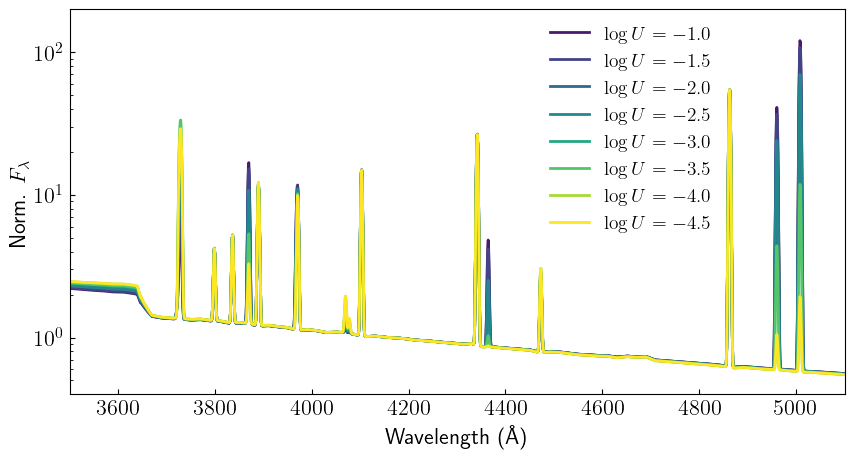

In [138]:
import matplotlib as mpl
vmap = mpl.colormaps['viridis']
# Take colors at regular intervals spanning the colormap.
cmap = vmap(np.linspace(0, 1, 16))


fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(lamU10, especU10/ np.mean( especU10[(lamU10 >4150)&(lamU10 <4175)]),lw=2, color=cmap[1], zorder=1, label=r'$\log U=-1.0$')
ax.plot(lamU15, especU15/ np.mean( especU15[(lamU15 >4150)&(lamU15 <4175)]),lw=2, color=cmap[3], zorder=2, label=r'$\log U=-1.5$')
ax.plot(lamU20, especU20/ np.mean( especU20[(lamU20 >4150)&(lamU20 <4175)]),lw=2, color=cmap[5], zorder=1, label=r'$\log U=-2.0$')
ax.plot(lamU25, especU25/ np.mean( especU25[(lamU25 >4150)&(lamU25 <4175)]),lw=2, color=cmap[7], zorder=2, label=r'$\log U=-2.5$')
ax.plot(lamU30, especU30/ np.mean( especU30[(lamU30 >4150)&(lamU30 <4175)]),lw=2, color=cmap[9], zorder=1, label=r'$\log U=-3.0$')
ax.plot(lamU35, especU35/ np.mean( especU35[(lamU35 >4150)&(lamU35 <4175)]),lw=2, color=cmap[11],zorder=2, label=r'$\log U=-3.5$')
ax.plot(lamU40, especU40/ np.mean( especU40[(lamU40 >4150)&(lamU40 <4175)]),lw=2, color=cmap[13],zorder=1, label=r'$\log U=-4.0$')
ax.plot(lamU45, especU45/ np.mean( especU45[(lamU45 >4150)&(lamU45 <4175)]),lw=2, color=cmap[15],zorder=2, label=r'$\log U=-4.5$')

ax.set_xlim(3500., 5100.)
ax.set_ylim(0.4e0, 2e2)
ax.set_yscale('log')
ax.legend(loc=(0.61,0.40), fontsize=14, frameon=False)
ax.set_xlabel(r'Wavelength (\AA) ', fontsize=16)
ax.set_ylabel(r'Norm. $F_\lambda$', fontsize=16)

In [214]:
output_notebook()  # show Bokeh inline in Jupyter

# ----------------------------------------------------
# 1. Normalize your existing spectra (no new FSPS calls)
# ----------------------------------------------------
def normalize_spec(lam, spec):
    norm = np.mean(spec[(lam > 4150) & (lam < 4175)])
    return spec / norm

specU10n  = normalize_spec(lamU10, especU10)
specU15n  = normalize_spec(lamU15, especU15)
specU20n  = normalize_spec(lamU20, especU20)
specU25n  = normalize_spec(lamU25, especU25)
specU30n  = normalize_spec(lamU30, especU30)
specU35n  = normalize_spec(lamU35, especU35)
specU40n  = normalize_spec(lamU40, especU40)
specU45n  = normalize_spec(lamU45, especU45)

# Assume all wavelengths are identical (FSPS standard)
lam = lamU10

# ----------------------------------------------------
# 2. Bundle everything in an ordered list for safety
# ----------------------------------------------------
LU_specs =  [("log U = -1.0",  specU10n), 
             ("log U = -1.5",  specU15n), 
             ("log U = -2.0",  specU20n), 
             ("log U = -2.5",  specU25n), 
             ("log U = -3.0",  specU30n), 
             ("log U = -3.5",  specU35n), 
             ("log U = -4.0",  specU40n), 
             ("log U = -4.5",  specU45n), ]

# Build the ColumnDataSource dict
data_dict = {"lam": lam}
col_names = []    # keys we'll use for plotting
labels    = []    # nice labels for legend & checkboxes

for i, (label, spec) in enumerate(LU_specs):
    col_name = f"logU_{i}"   # e.g., logU_0, logU_1, ...
    data_dict[col_name] = spec
    col_names.append(col_name)
    labels.append(label)

source = ColumnDataSource(data=data_dict)

# ----------------------------------------------------
# 3. Figure + lines (colors mapped 1:1 to age order)
# ----------------------------------------------------
colors = Viridis8  # 8 distinct colors

pU = figure(width=800, height=450, x_range=(3500, 5100), y_range=(0.4, 2e2),
           x_axis_type="linear", y_axis_type="log", title="FSPS nebular SEDs at different log Us",)

renderers = []
for col_name, color, label in zip(col_names, colors, labels):
    r = pU.line('lam', col_name, source=source, line_width=2, color=color, legend_label=label,)
    renderers.append(r)

pU.xaxis.axis_label = r"Wavelength (Å)"   # Å
pU.yaxis.axis_label = "Norm. Flux"         # Fλ
pU.legend.location = (550,150)
pU.legend.click_policy = "hide"  # click legend entries to hide/show

pU.title.text_font_size = "16pt"
pU.xaxis.axis_label_text_font_size = "14pt"
pU.yaxis.axis_label_text_font_size = "14pt"

# ----------------------------------------------------
# 4. Emission-line markers + hover labels
# ----------------------------------------------------
from bokeh.models import ColumnDataSource

# Emission-line dictionary: label → wavelength (Å)
hover_left   = []
hover_right  = []
hover_label  = []
hover_center = []

for name, lam0 in emission_lines.items():
    if lam.min() <= lam0 <= lam.max():
        hover_left.append(lam0 - 2.0)
        hover_right.append(lam0 + 2.0)
        hover_label.append(name)
        hover_center.append(lam0)

hover_source = ColumnDataSource(dict(
    left=hover_left, right=hover_right, label=hover_label, lam0=hover_center,))

quad_renderer = pU.quad(
    left="left",right="right",
    bottom=0.4,top=2e2,   # your y_range[0], # your y_range[1]
    source=hover_source,
    fill_alpha=0.0, line_alpha=0.0,
    hover_fill_alpha=0.0, hover_line_alpha=0.0,)

hover_lines = HoverTool(
    renderers=[quad_renderer],
    tooltips=[("Line", "@label"),("λ", "@lam0{0} Å"),],
    callback=hover_callback,)

pU.add_tools(hover_lines)

# Vertical line we’ll move around
vline = Span(location=0, dimension="height", line_color="black",
             line_width=1.5, line_alpha=0.0,  ) # start invisible
pU.add_layout(vline)

# JS callback on mouse move to control the vertical line
mouse_move_callback = CustomJS(
    args=dict(source=hover_source, vline=vline),
    code="""
        const lam0s = source.data['lam0'];
        const x = cb_obj.x;  // mouse x in data coordinates

        if (x == null) {
            vline.line_alpha = 0.0;
            return;       }

        let minDiff = Infinity;
        let closest = null;

        for (let i = 0; i < lam0s.length; i++) {
            const d = Math.abs(lam0s[i] - x);
            if (d < minDiff) {
                minDiff = d;
                closest = lam0s[i];           }       }

        // 2 Å sensitivity threshold
        if (minDiff <= 2.0) {
            vline.location = closest;
            vline.line_alpha = 0.8;
        } else {
            vline.line_alpha = 0.0;      }
    """)

# Attach to mouse move events on the figure
pU.js_on_event(MouseMove, mouse_move_callback)


# ----------------------------------------------------
# 5. Checkbox group to toggle visibility
# ----------------------------------------------------
checkboxes = []
for label in labels:
    cb = CheckboxGroup(labels=[label], active=[0])   # checked by default
    checkboxes.append(cb)

checkbox_row = row(*checkboxes)

# Callback to toggle line visibility
callback = CustomJS(
    args=dict(renderers=renderers, checkbox_list=checkboxes),
    code="""
        for (let i = 0; i < renderers.length; i++) {
            let cb = checkbox_list[i];
            renderers[i].visible = (cb.active.length > 0);}
    """)

# Connect each checkbox to the callback
for cb in checkboxes:
    cb.js_on_change("active", callback)

# ----------------------------------------------------
# 6. Layout + show + save
# ----------------------------------------------------
layoutU = column(pU, checkbox_row)
show(layoutU)

output_file("fsps_LUs_interactive.html", title="FSPS Age Series")
save(layoutU)


Loading BokehJS ...

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_LUs_interactive.html'

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_LUs_interactive.html'

# Variations in Metallicity:

In [147]:
# set up StellarPopulation objects
espZ01 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ05 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ07 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ10 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ20 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ40 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)
espZ70 = fsps.StellarPopulation(zcontinuous=1, add_neb_continuum=True, add_neb_emission=True)

# set paramters
espZ01.params['logzsol']  = -1.0
espZ01.params['gas_logz'] = -2.0 # gas metallicity
espZ01.params['gas_logu'] = -2.0 # ionization parameter

espZ05.params['logzsol']  = -1.0
espZ05.params['gas_logz'] = -1.3 # gas metallicity
espZ05.params['gas_logu'] = -2.0 # ionization parameter

espZ07.params['logzsol']  = -1.0
espZ07.params['gas_logz'] = -1.15 # gas metallicity
espZ07.params['gas_logu'] = -2.0 # ionization parameter

espZ10.params['logzsol']  = -1.0
espZ10.params['gas_logz'] = -1.0 # gas metallicity
espZ10.params['gas_logu'] = -2.0 # ionization parameter

espZ20.params['logzsol']  = -1.0
espZ20.params['gas_logz'] = -0.7 # gas metallicity
espZ20.params['gas_logu'] = -2.0 # ionization parameter

espZ40.params['logzsol']  = -1.0
espZ40.params['gas_logz'] = -0.4 # gas metallicity
espZ40.params['gas_logu'] = -2.0 # ionization parameter

espZ70.params['logzsol']  = -1.0
espZ70.params['gas_logz'] = -0.15 # gas metallicity
espZ70.params['gas_logu'] = -2.0 # ionization parameter

In [148]:
lamZ01, especZ01 = espZ01.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ05, especZ05 = espZ05.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ07, especZ07 = espZ07.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ10, especZ10 = espZ10.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ20, especZ20 = espZ20.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ40, especZ40 = espZ40.get_spectrum(peraa=True, tage=4.e6/1.e9)  
lamZ70, especZ70 = espZ70.get_spectrum(peraa=True, tage=4.e6/1.e9)  


Text(0, 0.5, 'Norm. $F_\\lambda$')

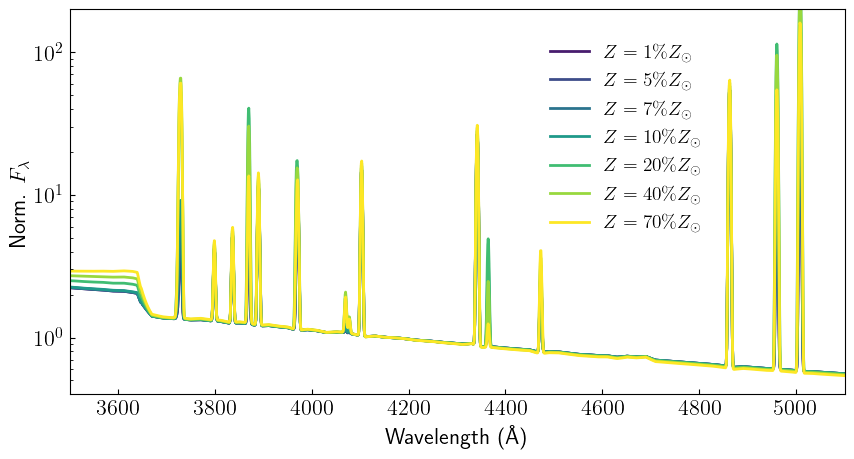

In [155]:
import matplotlib as mpl
vmap = mpl.colormaps['viridis']
# Take colors at regular intervals spanning the colormap.
cmap = vmap(np.linspace(0, 1, 14))


fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(lamZ01, especZ01/ np.mean( especZ01[(lamZ01 >4150)&(lamZ01 <4175)]),lw=2, color=cmap[1], zorder=1, label=r'$Z=1\% Z_\odot$')
ax.plot(lamZ05, especZ05/ np.mean( especZ05[(lamZ05 >4150)&(lamZ05 <4175)]),lw=2, color=cmap[3], zorder=1, label=r'$Z=5\% Z_\odot$')
ax.plot(lamZ07, especZ07/ np.mean( especZ07[(lamZ07 >4150)&(lamZ07 <4175)]),lw=2, color=cmap[5], zorder=1, label=r'$Z=7\% Z_\odot$')
ax.plot(lamZ10, especZ10/ np.mean( especZ10[(lamZ10 >4150)&(lamZ10 <4175)]),lw=2, color=cmap[7], zorder=1, label=r'$Z=10\% Z_\odot$')
ax.plot(lamZ20, especZ20/ np.mean( especZ20[(lamZ20 >4150)&(lamZ20 <4175)]),lw=2, color=cmap[9], zorder=1, label=r'$Z=20\% Z_\odot$')
ax.plot(lamZ40, especZ40/ np.mean( especZ40[(lamZ40 >4150)&(lamZ40 <4175)]),lw=2, color=cmap[11], zorder=1, label=r'$Z=40\% Z_\odot$')
ax.plot(lamZ70, especZ70/ np.mean( especZ70[(lamZ70 >4150)&(lamZ70 <4175)]),lw=2, color=cmap[13], zorder=1, label=r'$Z=70\% Z_\odot$')

ax.set_xlim(3500., 5100.)
ax.set_ylim(0.4e0, 2e2)
ax.set_yscale('log')
ax.legend(loc=(0.61,0.40), fontsize=14, frameon=False)
ax.set_xlabel(r'Wavelength (\AA) ', fontsize=16)
ax.set_ylabel(r'Norm. $F_\lambda$', fontsize=16)

In [215]:
output_notebook()  # show Bokeh inline in Jupyter

# ----------------------------------------------------
# 1. Normalize your existing spectra (no new FSPS calls)
# ----------------------------------------------------
def normalize_spec(lam, spec):
    norm = np.mean(spec[(lam > 4150) & (lam < 4175)])
    return spec / norm

specZ01n  = normalize_spec(lamZ01, especZ01)
specZ05n  = normalize_spec(lamZ05, especZ05)
specZ07n  = normalize_spec(lamZ07, especZ07)
specZ10n  = normalize_spec(lamZ10, especZ10)
specZ20n  = normalize_spec(lamZ20, especZ20)
specZ40n  = normalize_spec(lamZ40, especZ40)
specZ70n  = normalize_spec(lamZ70, especZ70)

# Assume all wavelengths are identical (FSPS standard)
lam = lamZ01

# ----------------------------------------------------
# 2. Bundle everything in an ordered list for safety
# ----------------------------------------------------
Z_specs =   [("Z = 1% Zsol",  specZ01n), 
             ("Z = 5% Zsol",  specZ05n),
             ("Z = 7% Zsol",  specZ07n),
             ("Z = 10% Zsol", specZ10n),
             ("Z = 20% Zsol", specZ20n),
             ("Z = 40% Zsol", specZ40n),
             ("Z = 70% Zsol", specZ70n),]

# Build the ColumnDataSource dict
data_dict = {"lam": lam}
col_names = []    # keys we'll use for plotting
labels    = []    # nice labels for legend & checkboxes

for i, (label, spec) in enumerate(Z_specs):
    col_name = f"Z_{i}"   # e.g., Z_0, Z_1, ...
    data_dict[col_name] = spec
    col_names.append(col_name)
    labels.append(label)

source = ColumnDataSource(data=data_dict)

# ----------------------------------------------------
# 3. Figure + lines (colors mapped 1:1 to age order)
# ----------------------------------------------------
colors = Viridis7  

pZ = figure(width=800, height=450, x_range=(3500, 5100), y_range=(0.4, 2e2),
           x_axis_type="linear", y_axis_type="log", title="FSPS nebular SEDs at different Metallicities",)

renderers = []
for col_name, color, label in zip(col_names, colors, labels):
    r = pZ.line('lam', col_name, source=source, line_width=2, color=color, legend_label=label,)
    renderers.append(r)

pZ.xaxis.axis_label = r"Wavelength (Å)"   # Å
pZ.yaxis.axis_label = "Norm. Flux"         # Fλ
pZ.legend.location = (550,150)
pZ.legend.click_policy = "hide"  # click legend entries to hide/show

pZ.title.text_font_size = "16pt"
pZ.xaxis.axis_label_text_font_size = "14pt"
pZ.yaxis.axis_label_text_font_size = "14pt"

# ----------------------------------------------------
# 4. Emission-line markers + hover labels
# ----------------------------------------------------
from bokeh.models import ColumnDataSource

# Emission-line dictionary: label → wavelength (Å)
hover_left   = []
hover_right  = []
hover_label  = []
hover_center = []

for name, lam0 in emission_lines.items():
    if lam.min() <= lam0 <= lam.max():
        hover_left.append(lam0 - 2.0)
        hover_right.append(lam0 + 2.0)
        hover_label.append(name)
        hover_center.append(lam0)

hover_source = ColumnDataSource(dict(
    left=hover_left, right=hover_right, label=hover_label, lam0=hover_center,))

quad_renderer = pZ.quad(
    left="left",right="right",
    bottom=0.4,top=2e2,   # your y_range[0], # your y_range[1]
    source=hover_source,
    fill_alpha=0.0, line_alpha=0.0,
    hover_fill_alpha=0.0, hover_line_alpha=0.0,)

hover_lines = HoverTool(
    renderers=[quad_renderer],
    tooltips=[("Line", "@label"),("λ", "@lam0{0} Å"),],
    callback=hover_callback,)

pZ.add_tools(hover_lines)

# Vertical line we’ll move around
vline = Span(location=0, dimension="height", line_color="black",
             line_width=1.5, line_alpha=0.0,  ) # start invisible
pZ.add_layout(vline)

# JS callback on mouse move to control the vertical line
mouse_move_callback = CustomJS(
    args=dict(source=hover_source, vline=vline),
    code="""
        const lam0s = source.data['lam0'];
        const x = cb_obj.x;  // mouse x in data coordinates

        if (x == null) {
            vline.line_alpha = 0.0;
            return;       }

        let minDiff = Infinity;
        let closest = null;

        for (let i = 0; i < lam0s.length; i++) {
            const d = Math.abs(lam0s[i] - x);
            if (d < minDiff) {
                minDiff = d;
                closest = lam0s[i];           }       }

        // 2 Å sensitivity threshold
        if (minDiff <= 2.0) {
            vline.location = closest;
            vline.line_alpha = 0.8;
        } else {
            vline.line_alpha = 0.0;      }
    """)

# Attach to mouse move events on the figure
pZ.js_on_event(MouseMove, mouse_move_callback)


# ----------------------------------------------------
# 5. Checkbox group to toggle visibility
# ----------------------------------------------------
checkboxes = []
for label in labels:
    cb = CheckboxGroup(labels=[label], active=[0])   # checked by default
    checkboxes.append(cb)

checkbox_row = row(*checkboxes)

# Callback to toggle line visibility
callback = CustomJS(
    args=dict(renderers=renderers, checkbox_list=checkboxes),
    code="""
        for (let i = 0; i < renderers.length; i++) {
            let cb = checkbox_list[i];
            renderers[i].visible = (cb.active.length > 0);}
    """)

# Connect each checkbox to the callback
for cb in checkboxes:
    cb.js_on_change("active", callback)

# ----------------------------------------------------
# 6. Layout + show + save
# ----------------------------------------------------
layoutZ = column(pZ, checkbox_row)
show(layoutZ)

output_file("fsps_Zs_interactive.html", title="FSPS Age Series")
save(layoutZ)


Loading BokehJS ...

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_Zs_interactive.html'

'/Users/dab5467/Library/CloudStorage/Box-Box/Box/TEACHING/AST-386C-GALAXIES/fsps_Zs_interactive.html'